# 目的: 期待値と分散を肌で感じとる

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [17]:
expect_values = [5, 2, 1.5, 1.5, 1.3, 1.2, 1.2, 1.2, 1.2, 1.15]
winrates = [0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 0.8, 0.9, 0.95, 0.99]
payouts = [e/w for e, w in zip(expect_values, winrates)]

## 問題設定
- 元手 1,000,000 円で、1,000回何らかの賭けをする。
- 我々は最強エーアイを作成することにした。
- その時の期待値と分散が与える効果を考える。

### どういうときにこの考えが使えるか？
- 例えば A, B, C, D がレースを行う。それぞれのオッズは 1.5, 2.0, 8.0, 150.0 だとする。
- 的中率はそれぞれ 60%, 24%, 15%, 1% だとする（真の値）。
- この時、期待値は 0.90, 0.48, 1.2, 1.5 である。
- 期待値が最も高いもの(D)に賭ければ、1,000円賭けて平均的に1,500円リターンが返ってくることになる。
- 1%の確率で 150,000 円返ってくるということ。 毎回 1,000円 賭ける場合、 10,000円持っている場合、 10回しか挑戦できないのでリスキーな気がするな...？
- A, D の両方賭ける場合（同じ額賭けるとする）、期待値は 1.2((1.5+0.9)/2) となり、期待値は落ちてしまうが、的中率(返ってくる確率)は61%となる。 

In [18]:
# bet額固定
def simulation_constant(winrate, payout, bet, num_loops=10):
    # 複数回回す
    history = []
    np.random.seed(seed=42)
    for j in range(num_loops):
        seed = 1_000_000
        tmp = [0 for _ in range(1000)]
        for i in range(1000):
            seed -= min(bet, seed)
            rand = np.random.rand()
            if (winrate > rand):
                seed += bet*payout
            tmp[i] = seed
            if seed <= 0:
                break
        history.append(tmp)
    return history

In [19]:
def plot_simulation(history, expect_value, winrate):
    fig = plt.figure(figsize=(12, 8), )
    ax = fig.add_subplot(111)
    fig.patch.set_facecolor('white') 
    plt.yscale("log")
    plt.title(f"Expect Value: {expect_value}, Win Rate: {winrate}")
    x = np.arange(len(history[0]))
    for y_ in history:
        y = np.array(y_)
        ax.plot(x, y)

### bet 額定数

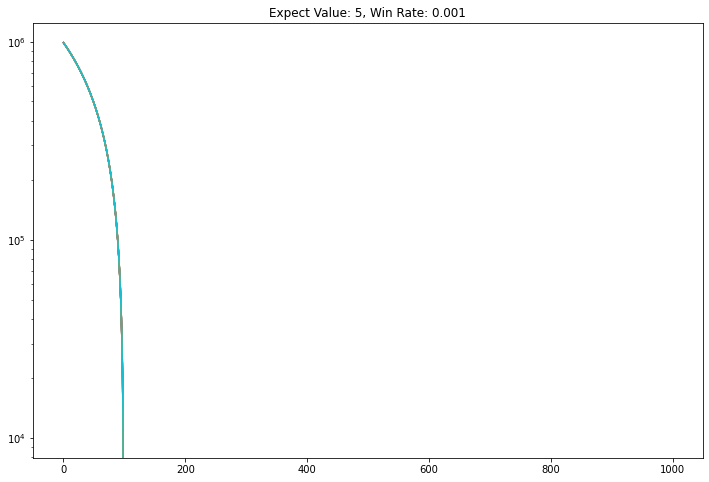

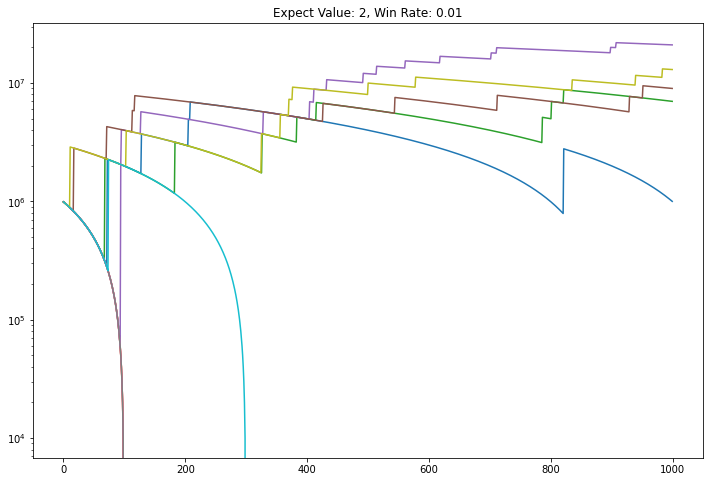

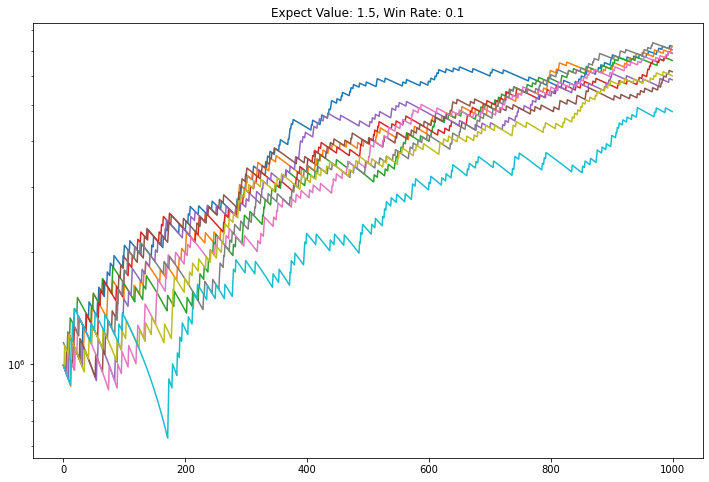

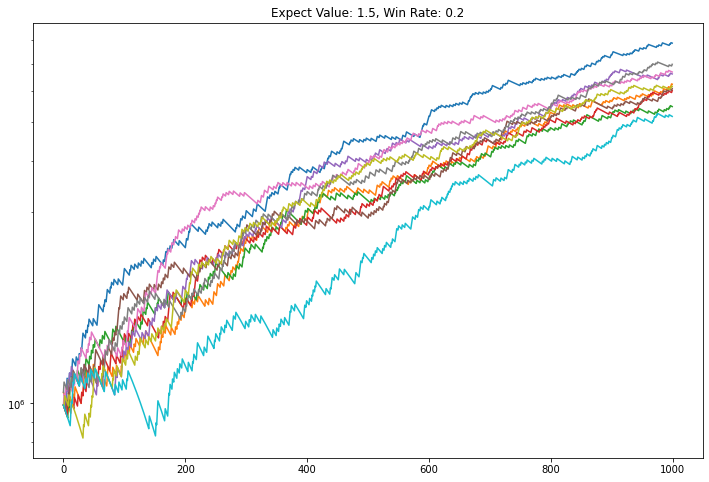

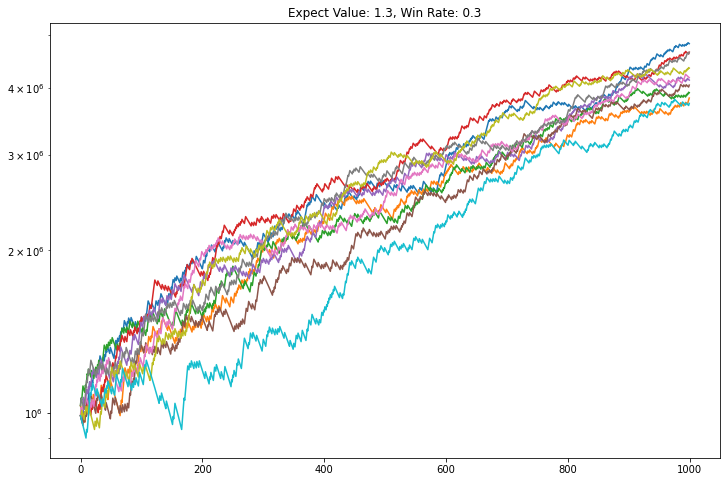

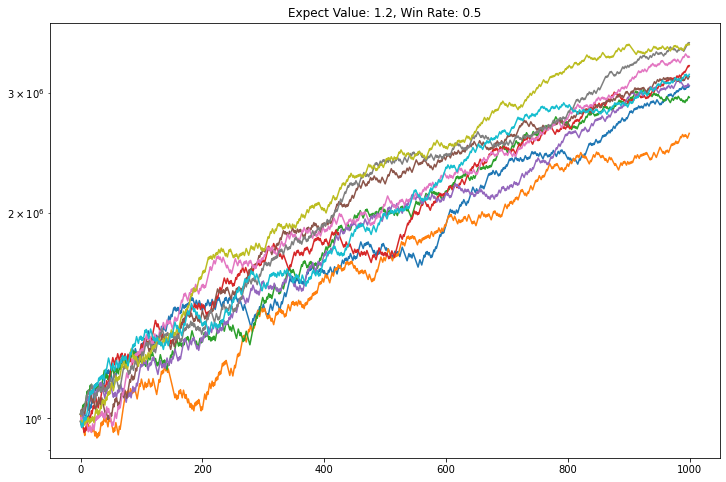

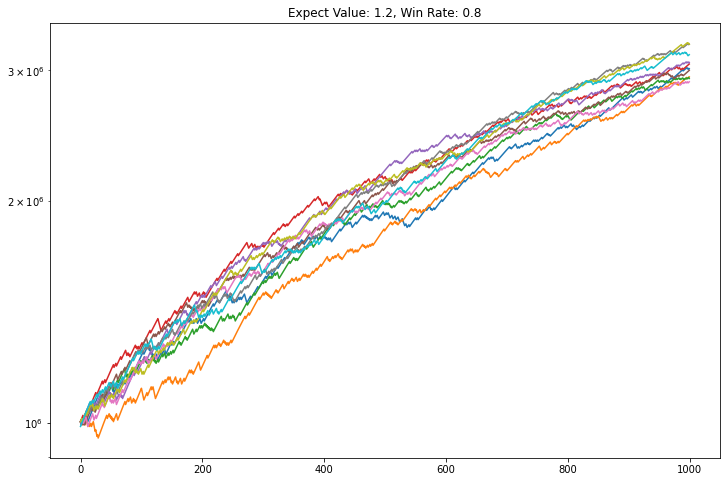

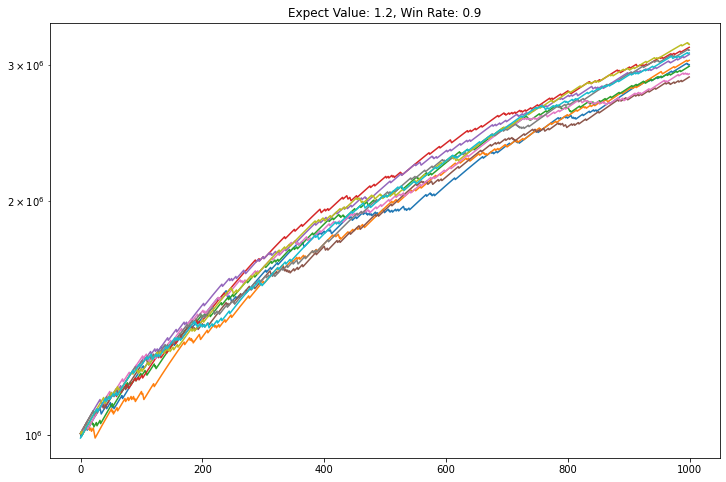

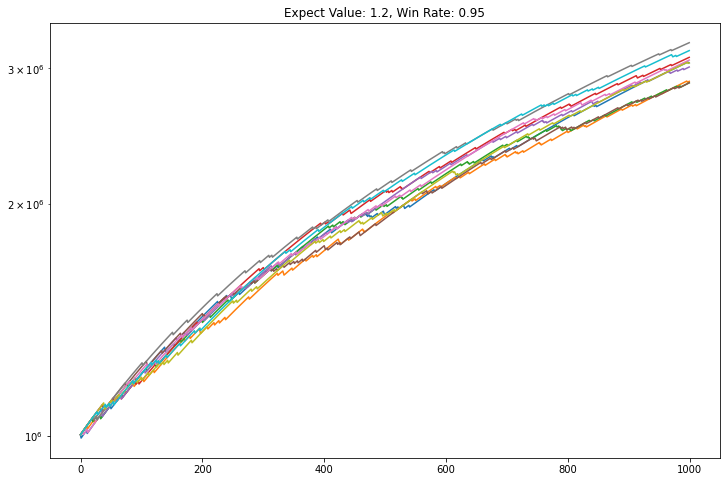

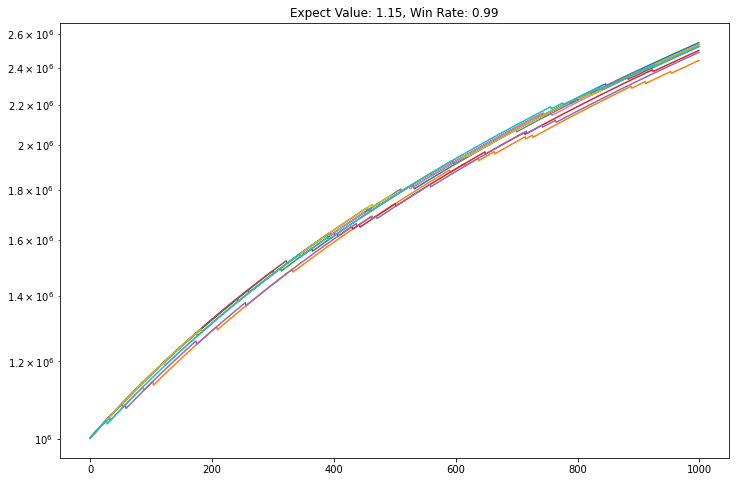

In [20]:
for i in range(len(winrates)): 
    expect_value = expect_values[i]
    winrate = winrates[i]
    payout = payouts[i]
    history = simulation_constant(winrate, payout, 10000)
    plot_simulation(history, expect_value, winrate) 
    

### bet額を動的に変える
- 100円賭けて 2,000円儲ける回収率2000% と 10,000円賭けて 200,000 儲ける回収率2000% があるというのを念頭に置くと良い。
  - 後者が回収率2000%でなく、200%だとしても、+10,000円、前者は+1,900円 となり儲けの絶対値は後者のほうが大きい

In [21]:
def bet_winrate(seed, winrate):
    return int(seed * winrate)

def bet_divided_constant(seed, winrate):
    return int(seed / 10)

def simulation_func(winrate, payout, func, num_loops=10):
    # 複数回回す
    history = []
    np.random.seed(seed=42)
    for j in range(num_loops):
        seed = 1_000_000
        tmp = [0 for _ in range(1000)]
        for i in range(1000):
            bet = max(func(seed, winrate), 1)
            seed -= min(bet, seed)
            rand = np.random.rand()
            if (winrate > rand):
                seed += bet*payout
            tmp[i] = seed
            if seed <= 0:
                break
        history.append(tmp)
    return history

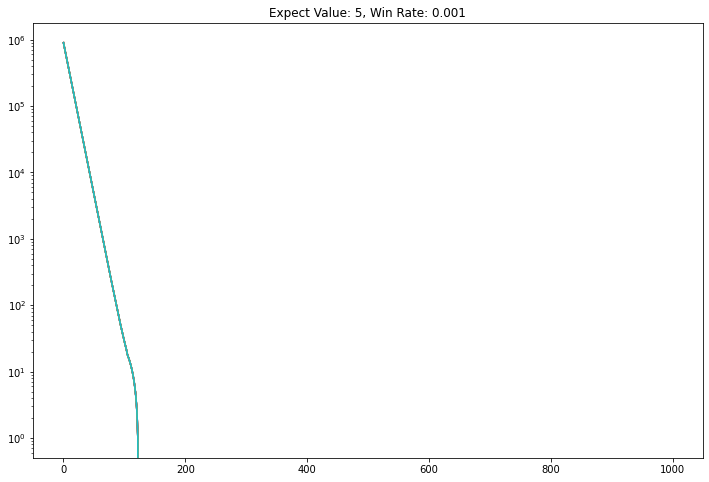

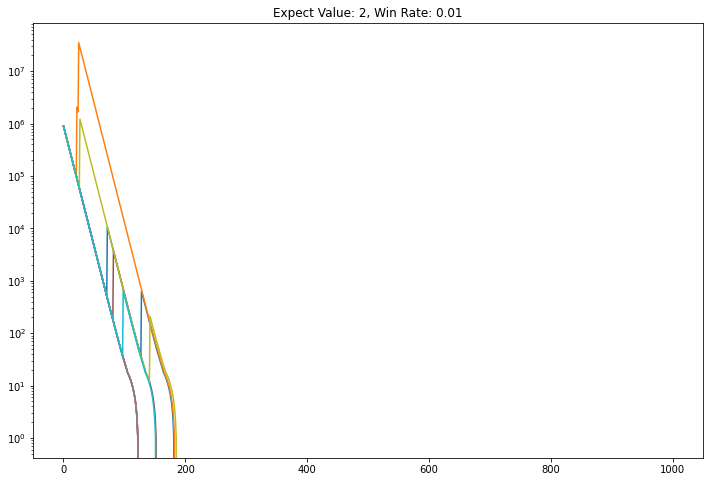

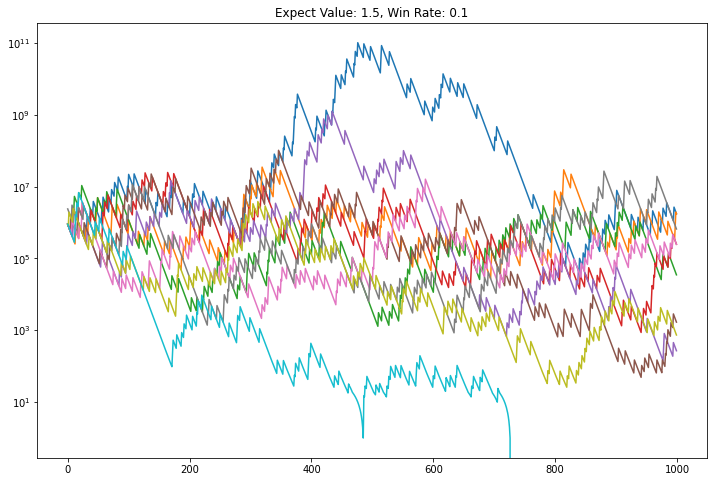

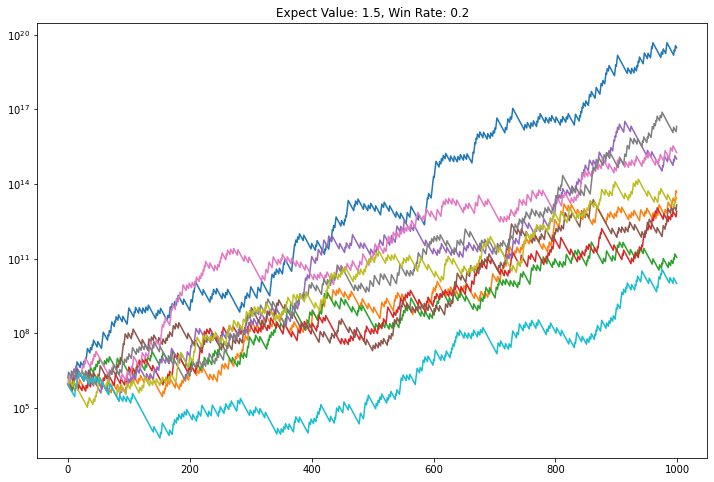

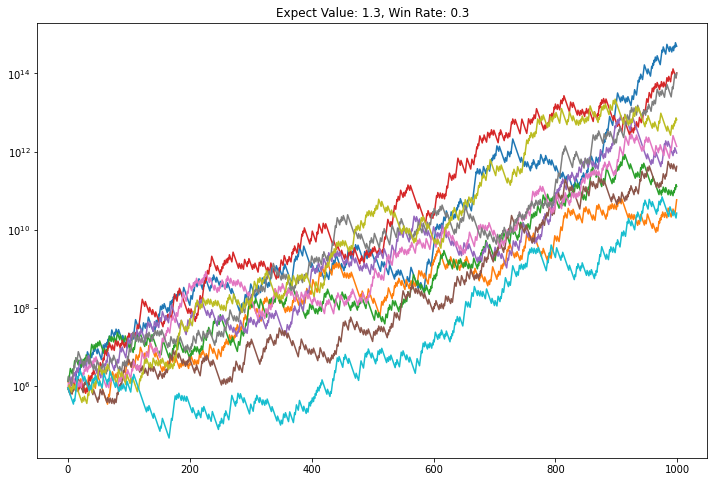

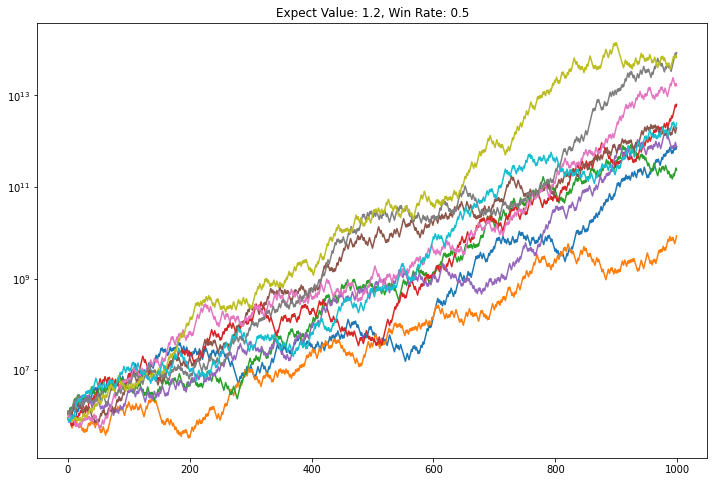

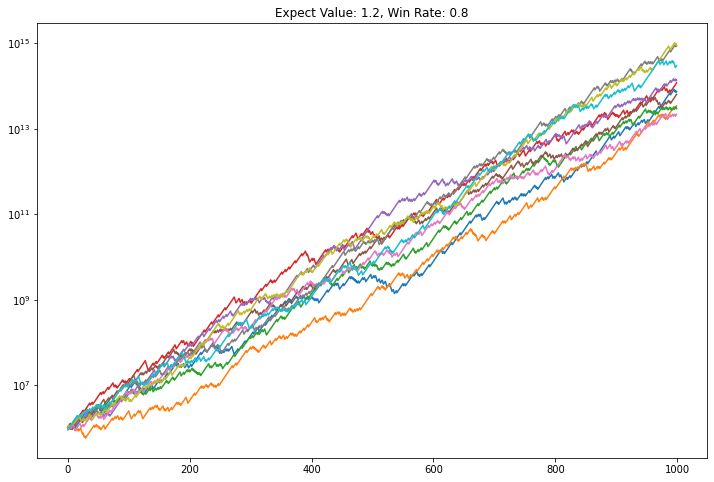

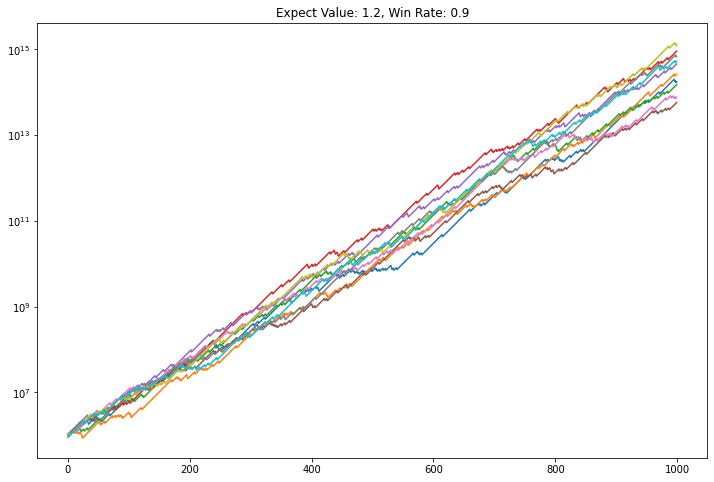

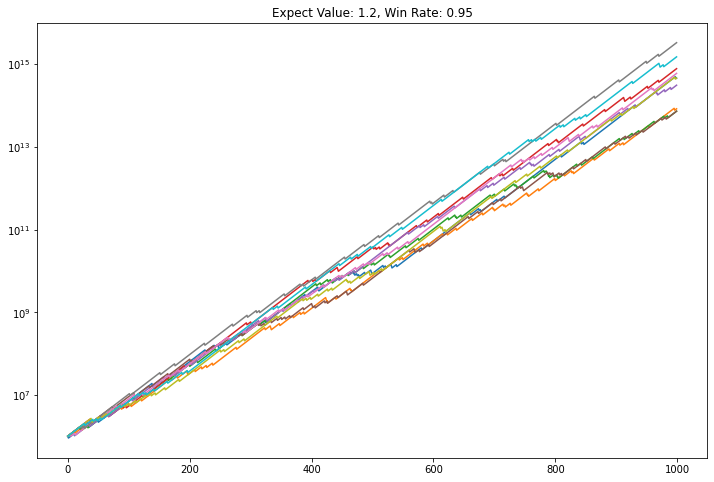

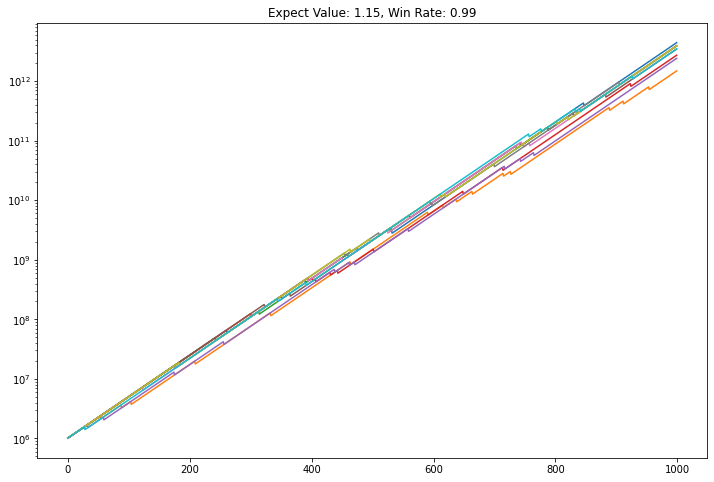

In [22]:
for i in range(len(winrates)): 
    expect_value = expect_values[i]
    winrate = winrates[i]
    payout = payouts[i]
    history = simulation_func(winrate, payout, bet_divided_constant)
    plot_simulation(history, expect_value, winrate) 

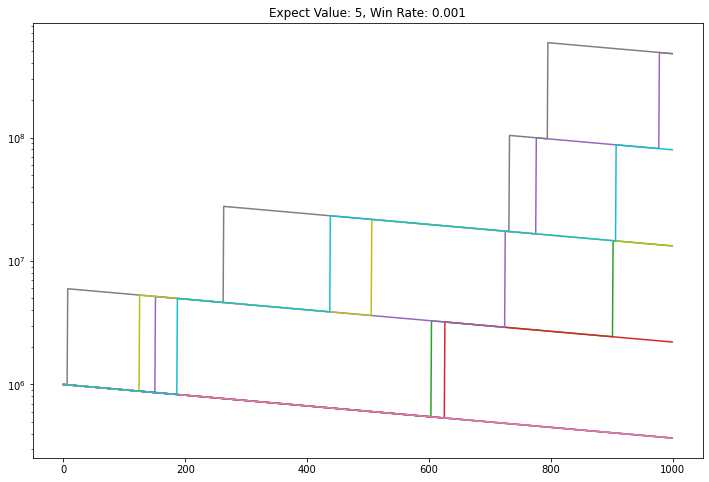

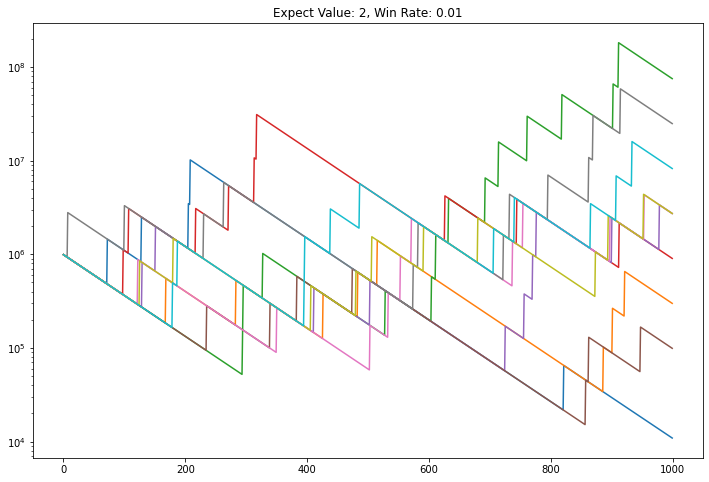

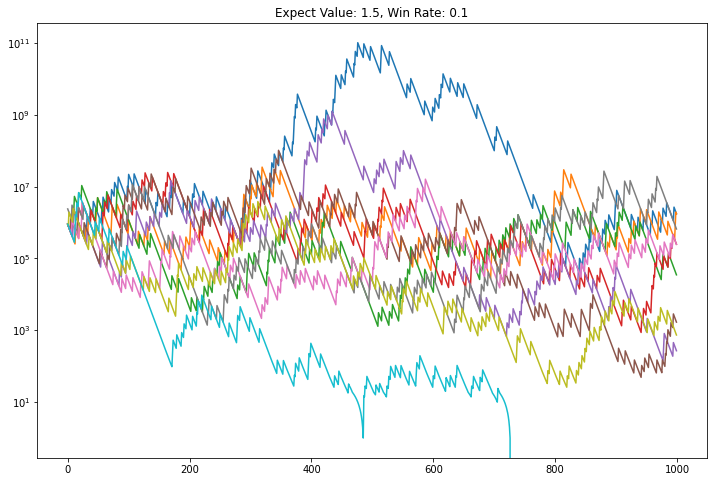

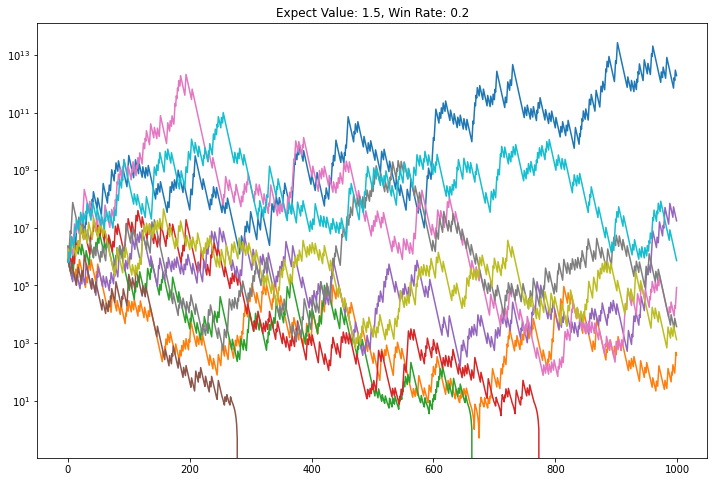

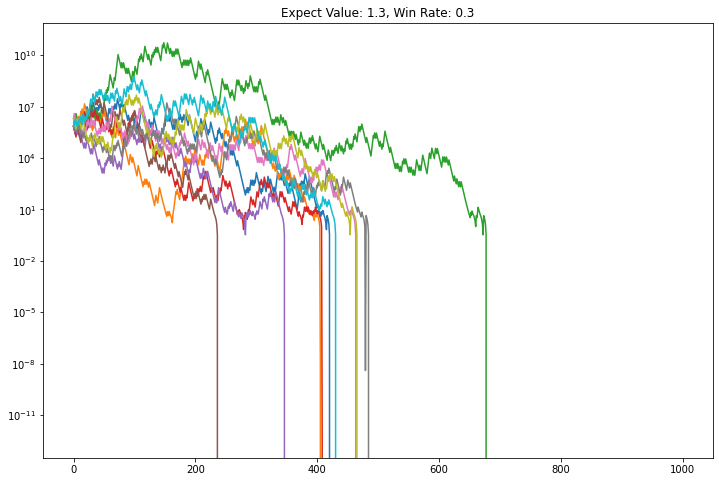

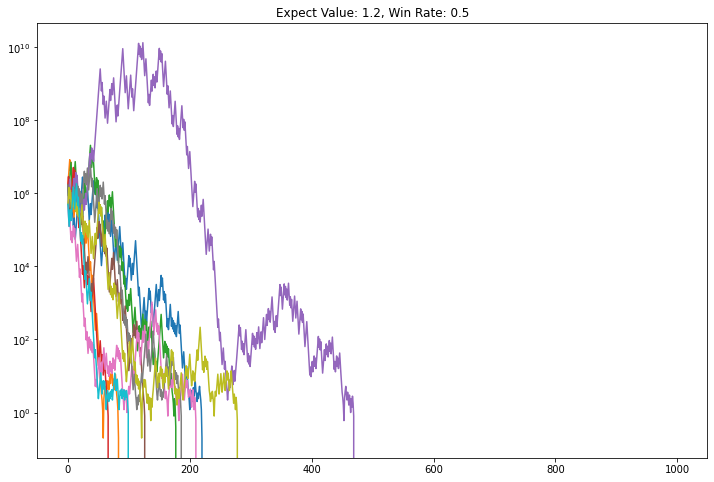

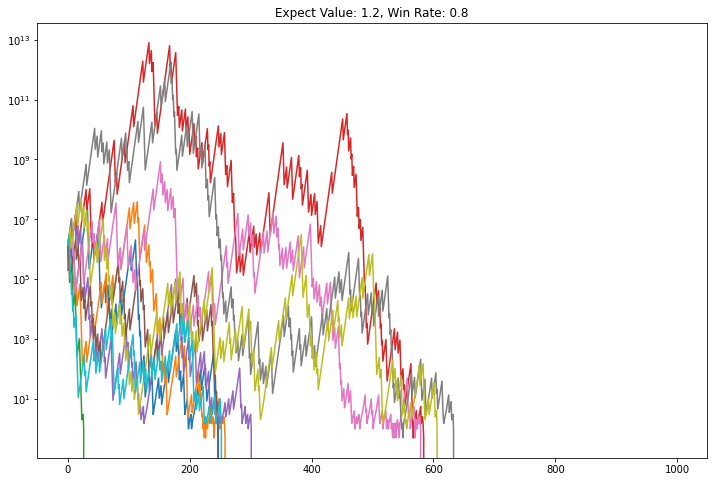

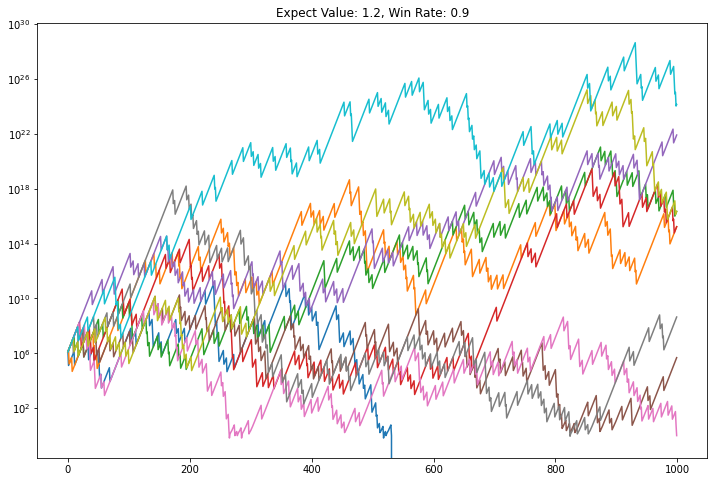

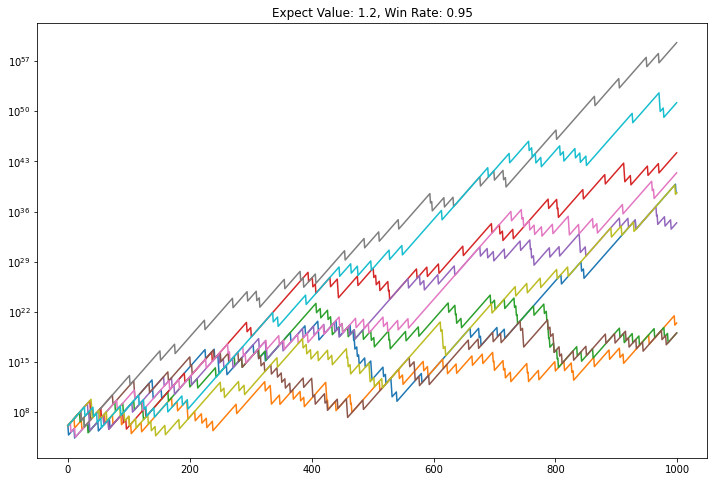

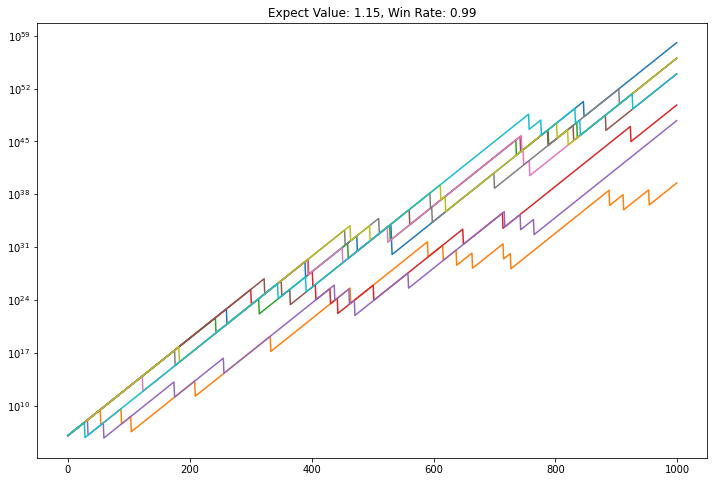

In [23]:
for i in range(len(winrates)): 
    expect_value = expect_values[i]
    winrate = winrates[i]
    payout = payouts[i]
    history = simulation_func(winrate, payout, bet_winrate)
    plot_simulation(history, expect_value, winrate) 

## 破産率と平均収支

In [24]:
# 毎回 10,000 円賭ける場合
for i in range(len(winrates)): 
    expect_value = expect_values[i]
    winrate = winrates[i]
    payout = payouts[i]
    history = simulation_constant(winrate, payout, 10000, 10000)
    print("---")
    print("期待値: {}倍, 的中率: {}%".format(expect_value, winrate*100))
    print("破産率: {}%".format(sum(0 in h for h in history)/len(history)*100))
    print("平均収支: {:,}円".format(int(sum(h[-1] for h in history)/len(history))-1_000_000))
    


---
期待値: 5倍, 的中率: 0.1%
破産率: 90.07%
平均収支: 7,811,300円
---
期待値: 2倍, 的中率: 1.0%
破産率: 44.05%
平均収支: 6,254,100円
---
期待値: 1.5倍, 的中率: 10.0%
破産率: 0.16999999999999998%
平均収支: 5,010,170円
---
期待値: 1.5倍, 的中率: 20.0%
破産率: 0.0%
平均収支: 5,003,187円
---
期待値: 1.3倍, 的中率: 30.0%
破産率: 0.0%
平均収支: 3,000,948円
---
期待値: 1.2倍, 的中率: 50.0%
破産率: 0.0%
平均収支: 1,999,419円
---
期待値: 1.2倍, 的中率: 80.0%
破産率: 0.0%
平均収支: 2,000,847円
---
期待値: 1.2倍, 的中率: 90.0%
破産率: 0.0%
平均収支: 2,001,875円
---
期待値: 1.2倍, 的中率: 95.0%
破産率: 0.0%
平均収支: 2,000,335円
---
期待値: 1.15倍, 的中率: 99.0%
破産率: 0.0%
平均収支: 1,500,130円


In [25]:
# seed の 1/10 賭ける場合
for i in range(len(winrates)): 
    expect_value = expect_values[i]
    winrate = winrates[i]
    payout = payouts[i]
    history = simulation_func(winrate, payout, bet_divided_constant, 10000)
    print("---")
    print("期待値: {}倍, 的中率: {}%".format(expect_value, winrate*100))
    print("破産率: {}%".format(sum(0 in h for h in history)/len(history)*100))
    print("平均収支: {:,}円".format(int(sum(h[-1] for h in history)/len(history))-1_000_000))

---
期待値: 5倍, 的中率: 0.1%
破産率: 100.0%
平均収支: -1,000,000円
---
期待値: 2倍, 的中率: 1.0%
破産率: 100.0%
平均収支: -1,000,000円
---
期待値: 1.5倍, 的中率: 10.0%
破産率: 34.5%
平均収支: 417,718,112,422,220円
---
期待値: 1.5倍, 的中率: 20.0%
破産率: 0.02%
平均収支: 132,842,934,423,056,213,392,832円
---
期待値: 1.3倍, 的中率: 30.0%
破産率: 0.0%
平均収支: 806,267,641,248,917,824円
---
期待値: 1.2倍, 的中率: 50.0%
破産率: 0.0%
平均収支: 450,490,359,999,021円
---
期待値: 1.2倍, 的中率: 80.0%
破産率: 0.0%
平均収支: 398,093,580,385,151円
---
期待値: 1.2倍, 的中率: 90.0%
破産率: 0.0%
平均収支: 409,889,557,127,703円
---
期待値: 1.2倍, 的中率: 95.0%
破産率: 0.0%
平均収支: 399,283,629,900,112円
---
期待値: 1.15倍, 的中率: 99.0%
破産率: 0.0%
平均収支: 2,925,742,745,954円


In [26]:
# seed の winrate 倍賭ける場合
for i in range(len(winrates)): 
    expect_value = expect_values[i]
    winrate = winrates[i]
    payout = payouts[i]
    history = simulation_func(winrate, payout, bet_winrate, 10000)
    print("---")
    print("期待値: {}倍, 的中率: {}%".format(expect_value, winrate*100))
    print("破産率: {}%".format(sum(0 in h for h in history)/len(history)*100))
    print("平均収支: {:,}円".format(int(sum(h[-1] for h in history)/len(history))-1_000_000))

---
期待値: 5倍, 的中率: 0.1%
破産率: 0.0%
平均収支: 52,208,963円
---
期待値: 2倍, 的中率: 1.0%
破産率: 0.0%
平均収支: 3,468,590,981円
---
期待値: 1.5倍, 的中率: 10.0%
破産率: 34.5%
平均収支: 417,718,112,422,220円
---
期待値: 1.5倍, 的中率: 20.0%
破産率: 57.269999999999996%
平均収支: 264,483,614,183,872,448円
---
期待値: 1.3倍, 的中率: 30.0%
破産率: 97.63%
平均収支: 184,406,553円
---
期待値: 1.2倍, 的中率: 50.0%
破産率: 99.98%
平均収支: -1,000,000円
---
期待値: 1.2倍, 的中率: 80.0%
破産率: 94.87%
平均収支: 2,065,211,105,914,222,272円
---
期待値: 1.2倍, 的中率: 90.0%
破産率: 24.41%
平均収支: 447,933,308,974,445,660,581,326,599,058,783,568,384,802,240円
---
期待値: 1.2倍, 的中率: 95.0%
破産率: 0.35000000000000003%
平均収支: 59,773,125,620,013,088,386,680,206,086,115,433,369,845,087,274,729,275,537,800,640円
---
期待値: 1.15倍, 的中率: 99.0%
破産率: 0.0%
平均収支: 54,112,365,643,091,840,091,431,834,891,576,516,639,759,327,985,178,413,461,750,726,080円


In [28]:
def bet_winrate_half(seed, winrate):
    return int(seed * winrate * 0.5)
# seed の winrate*0.5 倍賭ける場合
for i in range(len(winrates)): 
    expect_value = expect_values[i]
    winrate = winrates[i]
    payout = payouts[i]
    history = simulation_func(winrate, payout, bet_winrate_half, 10000)
    print("---")
    print("期待値: {}倍, 的中率: {}%".format(expect_value, winrate*100))
    print("破産率: {}%".format(sum(0 in h for h in history)/len(history)*100))
    print("平均収支: {:,}円".format(int(sum(h[-1] for h in history)/len(history))-1_000_000))

---
期待値: 5倍, 的中率: 0.1%
破産率: 0.0%
平均収支: 6,736,467円
---
期待値: 2倍, 的中率: 1.0%
破産率: 0.0%
平均収支: 122,655,130円
---
期待値: 1.5倍, 的中率: 10.0%
破産率: 0.02%
平均収支: 241,168,089,962,042円
---
期待値: 1.5倍, 的中率: 20.0%
破産率: 0.02%
平均収支: 132,842,934,423,056,129,506,752円
---
期待値: 1.3倍, 的中率: 30.0%
破産率: 0.8200000000000001%
平均収支: 916,829,202,944,258,522,560円
---
期待値: 1.2倍, 的中率: 50.0%
破産率: 2.33%
平均収支: 37,305,294,208,168,788,803,008円
---
期待値: 1.2倍, 的中率: 80.0%
破産率: 0.0%
平均収支: 79,464,108,100,599,620,614,587,125,137,980,864円
---
期待値: 1.2倍, 的中率: 90.0%
破産率: 0.0%
平均収支: 14,926,345,681,990,360,065,598,321,971,275,017,290,300,864円
---
期待値: 1.2倍, 的中率: 95.0%
破産率: 0.0%
平均収支: 1,500,832,942,543,308,952,225,368,810,276,525,920,633,273,792円
---
期待値: 1.15倍, 的中率: 99.0%
破産率: 0.0%
平均収支: 12,275,196,065,848,467,495,709,581,060,319,788,480円


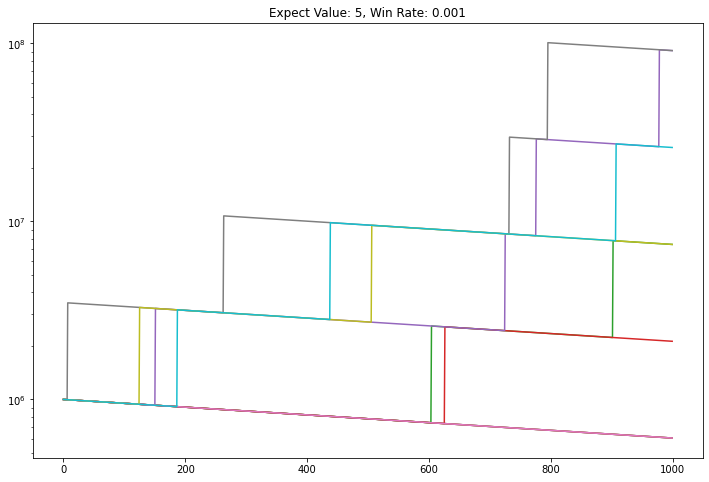

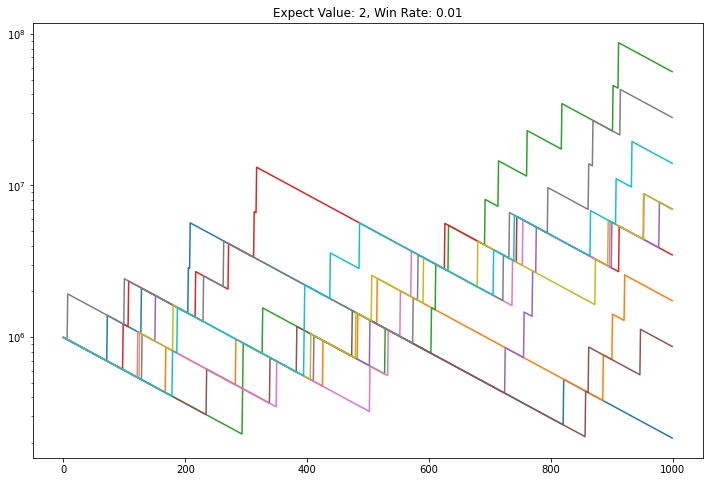

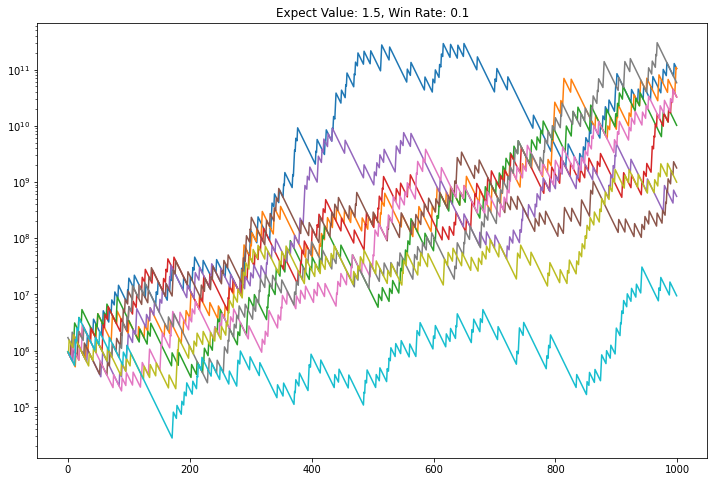

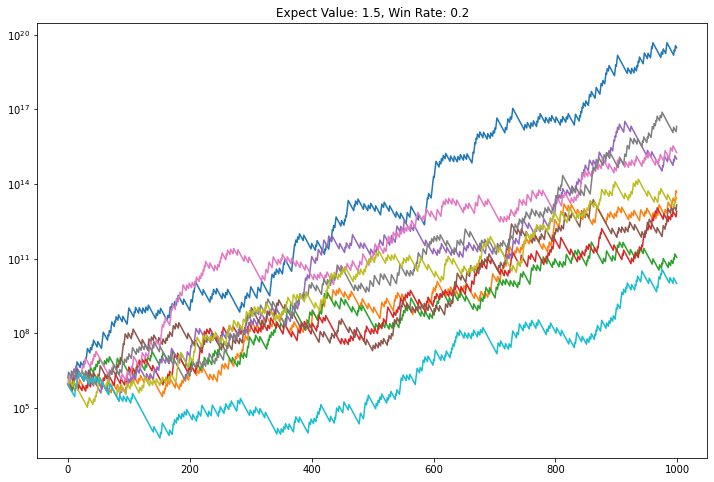

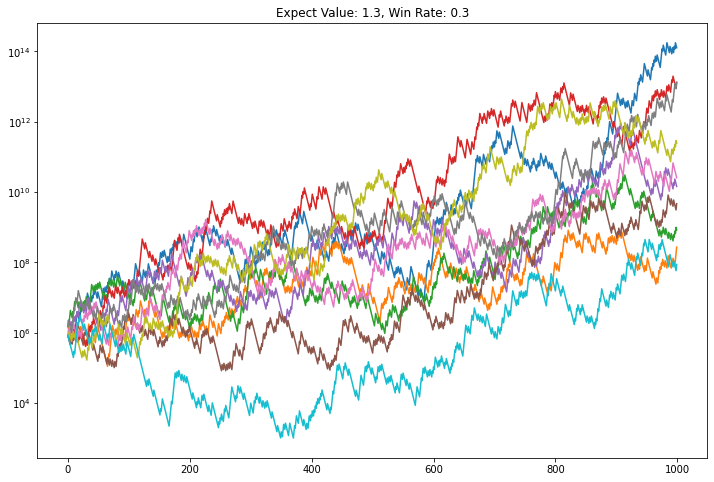

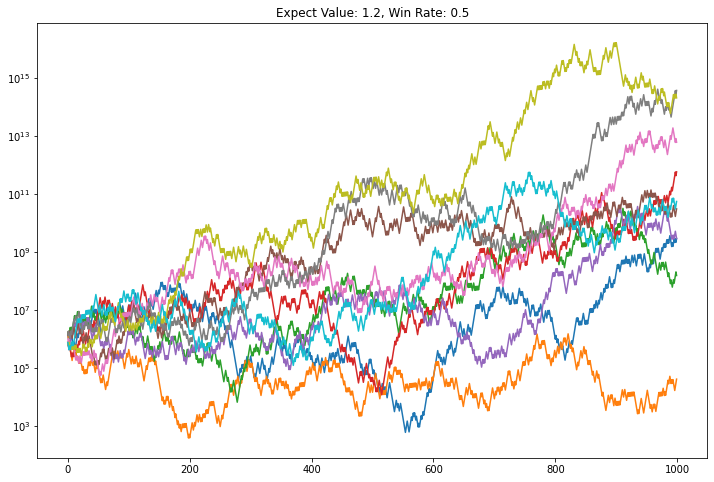

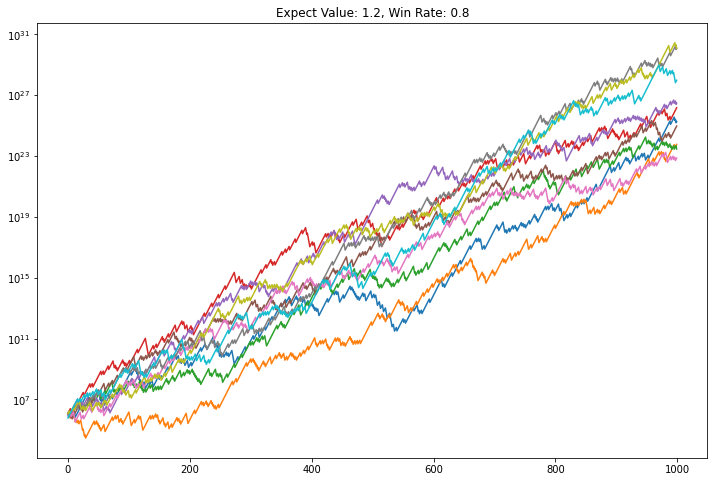

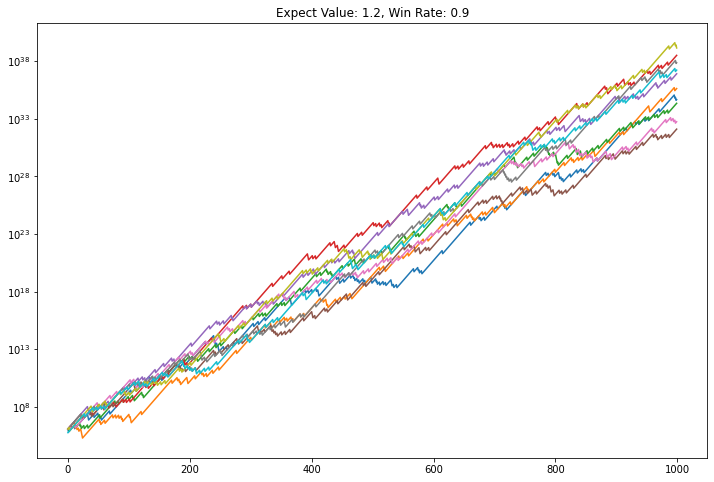

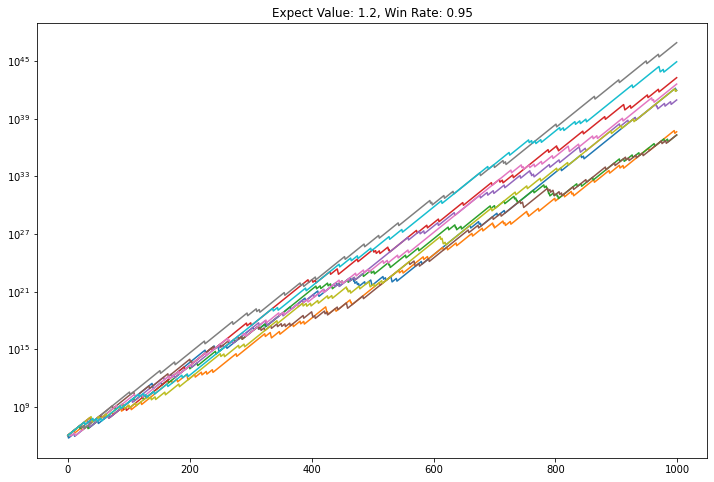

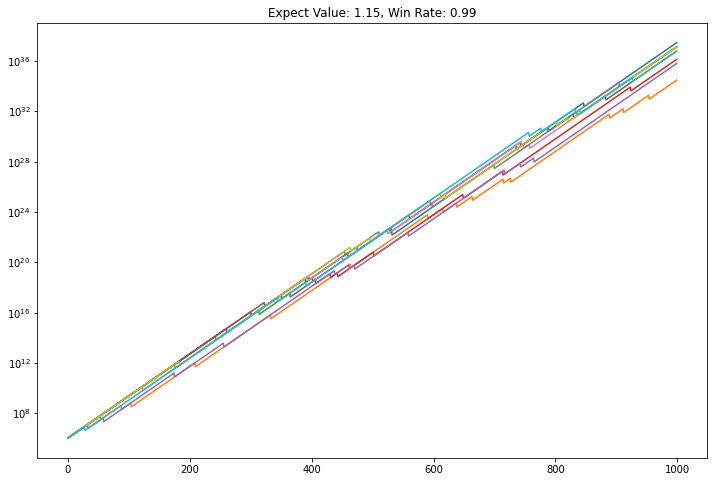

In [29]:
for i in range(len(winrates)): 
    expect_value = expect_values[i]
    winrate = winrates[i]
    payout = payouts[i]
    history = simulation_func(winrate, payout, bet_winrate_half)
    plot_simulation(history, expect_value, winrate) 